In [1]:
import pandas as pd
import os
import numpy as np
import pickle

import matplotlib.pyplot as plt
from statistics import mean
import math
from math import log
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5


In [2]:
pkl_file = open('blineled.pkl', 'rb')
mydata = pickle.load(pkl_file)
#pkl_file = open('blineled.pkl', 'rb')
#myled = pickle.load(pkl_file)

In [3]:
#mask1=mydata['ch0'] < 16382
#mask1

In [4]:
#for key, value in mydata.items():
#    print(key, "=", value )

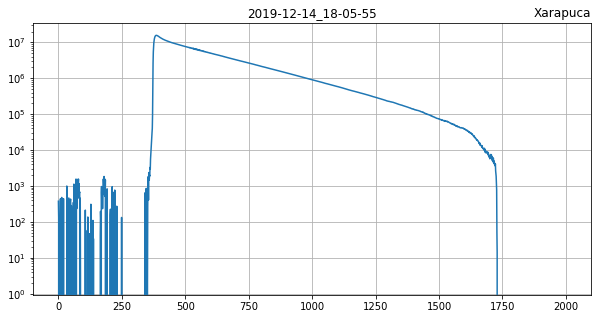

In [5]:

plt.title('2019-12-14_18-05-55')
#plt.title('one event', loc='left')
plt.title('Xarapuca', loc='right')
plt.yscale('log')
plt.grid(True)
#t = np.arange(len(mydata['ch2']))
#plt.xlim(1720, 1730)
#plt.ylim(-350, 350)
data=(mydata['ch0']).sum(axis=0)
plt.plot(data)

#print(mydata['ch0'].shape)
plt.show()

ch0


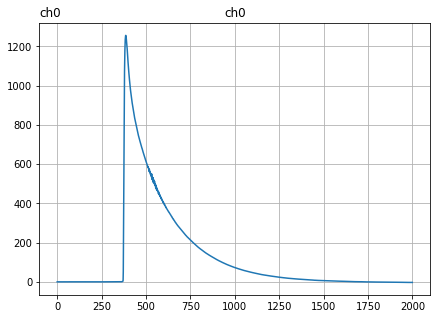

ch1


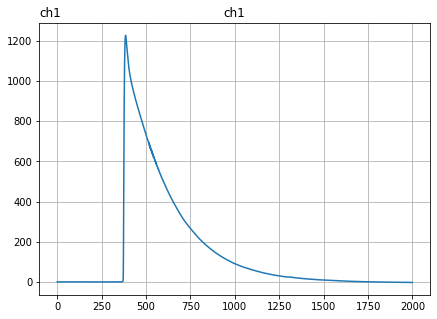

ch10


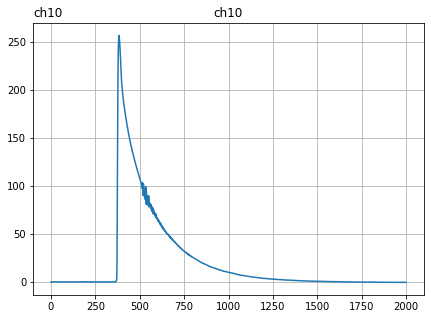

ch11


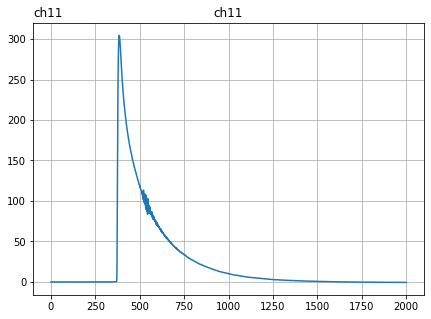

ch2


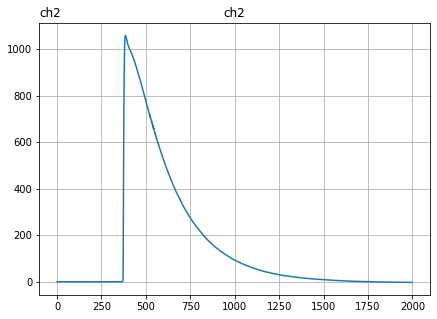

ch3


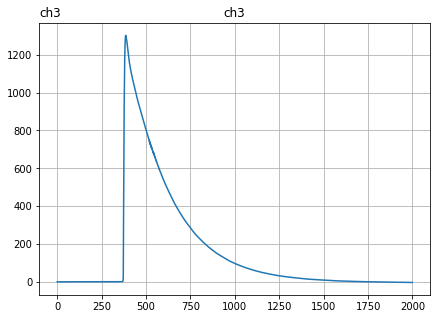

ch8


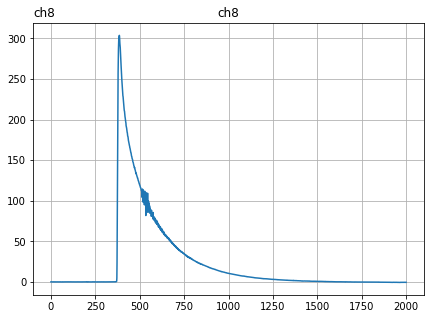

ch9


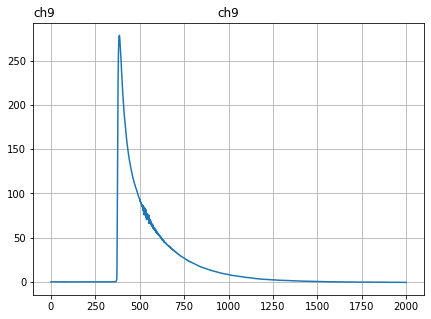

In [6]:
rcParams['figure.figsize'] = 7, 5
for key, value in mydata.items():
    data1=np.where(mydata[key] < 16300, mydata[key], 0)
    
    print(key)
    data=data1.mean(axis=0)
    plt.grid(True)
    t = np.arange(len(data))
    #plt.yscale('log')
    #plt.xlim(1500, 2200)
    #plt.ylim(0.00001, 10000)
    plt.title(key)
    plt.title(key, loc='left')
    #plt.title(key, loc='right')    
    
    plt.plot(data)
    plt.show()


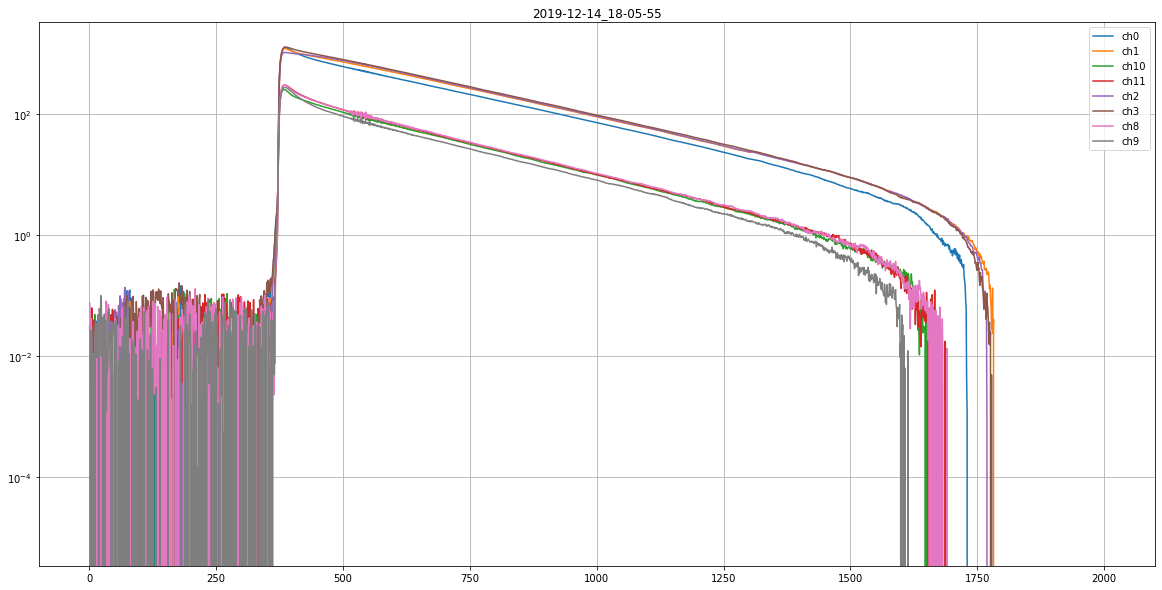

In [7]:
rcParams['figure.figsize'] = 20, 10
from scipy.ndimage import gaussian_filter
from scipy import signal 

dict_s ={}
for key, value in mydata.items():
#    data1=np.where(mydata[key] < 16300, mydata[key], 0)
    data1=mydata[key]
    #data1 = signal.wiener(sig)
    #data1=signal.weiner(mydata[key])
    #data1=gaussian_filter(mydata[key], sigma=1) 
  
    #print(key)
    dict_s.update({key:data1.mean(axis=0)})

for key, value in dict_s.items():
    plt.plot(range(1, len(value) + 1), value, label=key)
    # NOTE: changed `range(1, 4)` to mach actual values count
plt.title('2019-12-14_18-05-55')
plt.yscale('log')
plt.grid(True)
#plt.ylim(0.001, 10000)
#plt.xlim(250, 1800)
plt.legend()  # To draw legend
plt.show()


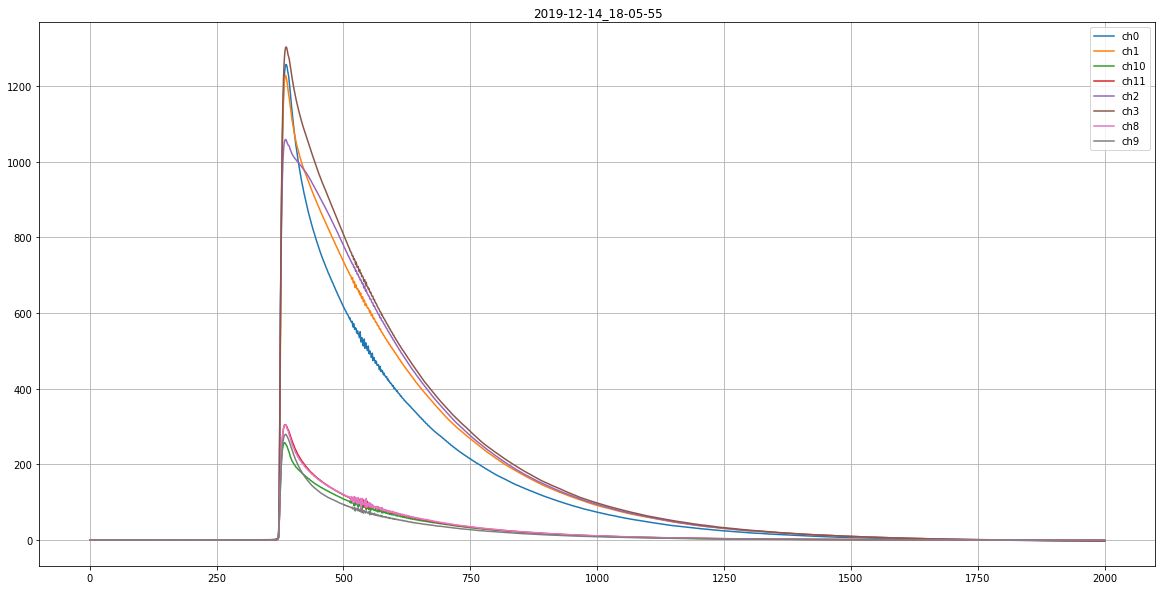

In [8]:
rcParams['figure.figsize'] = 20, 10

dict_s ={}
for key, value in mydata.items():
#    data1=np.where(mydata[key] < 16300, mydata[key], 0)
    data1=mydata[key]
    
    #print(key)
    dict_s.update({key:data1.mean(axis=0)})

for key, value in dict_s.items():
    plt.plot(range(1, len(value) + 1), value, label=key)
    # NOTE: changed `range(1, 4)` to mach actual values count
plt.title('2019-12-14_18-05-55')
##plt.yscale('log')
plt.grid(True)
#plt.ylim(0, 200)
#plt.xlim(368, 376)
plt.legend()  # To draw legend
plt.show()


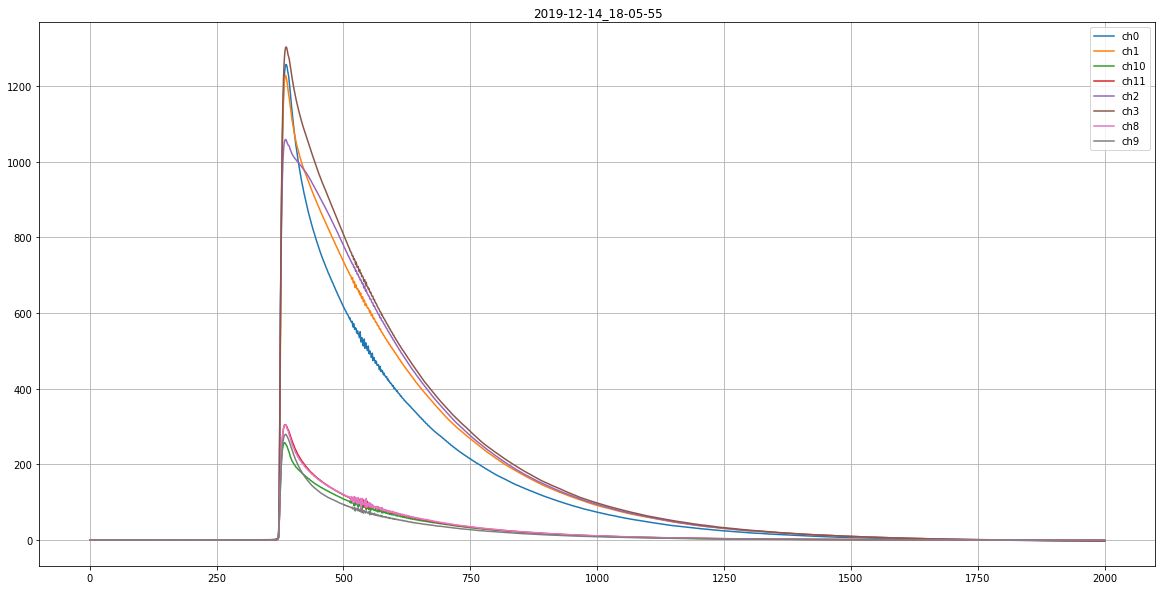

In [9]:
rcParams['figure.figsize'] = 20, 10

dict_s ={}
for key, value in mydata.items():
#    data1=np.where(mydata[key] < 16300, mydata[key], 0)
    data1=mydata[key]
    
    #print(key)
    dict_s.update({key:data1.mean(axis=0)})

for key, value in dict_s.items():
    
    plt.plot(range(1, len(value) + 1), value, label=key)
    # NOTE: changed `range(1, 4)` to mach actual values count
plt.title('2019-12-14_18-05-55')
##plt.yscale('log')
plt.grid(True)
#plt.ylim(0, 200)
#plt.xlim(368, 376)
plt.legend()  # To draw legend
plt.show()

[-0.00854556  0.00391444 -0.01117556 ... -1.76469556 -1.75779556
 -1.72154556]


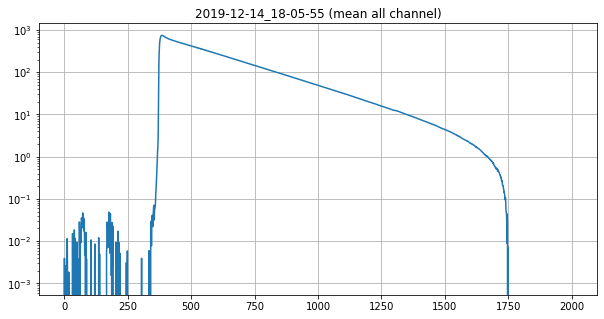

In [10]:
rcParams['figure.figsize'] = 10, 5

dict_s ={}
for key, value in mydata.items():
#    data1=np.where(mydata[key] < 16300, mydata[key], 0)
    data1=mydata[key]
    
    #print(key)
    dict_s.update({key:data1.mean(axis=0)})

data1=np.array(list(dict_s.values())).mean(axis=0)
np.savetxt("meanchannnel.csv", data1, delimiter=",")    
print(data1)
plt.plot(data1)
t = np.arange(len(data1))

plt.title('2019-12-14_18-05-55 (mean all channel)')
plt.yscale('log')
plt.grid(True)
#plt.ylim(0, 200)
#plt.xlim(368, 376)
#plt.legend()  # To draw legend
#plt.show()


In [11]:
def model(t, coeffs):
    #return (coeffs[0]*np.exp(-(t-coeffs[1])/coeffs[2]) + coeffs[3]*np.exp(-(t-coeffs[1])/coeffs[4]))
    return (coeffs[0]+ coeffs[1]*np.exp(-(t-coeffs[2])/coeffs[3]) )

In [12]:
def model(t, coeffs):
    #return (coeffs[0]*np.exp(-(t-coeffs[1])/coeffs[2]) + coeffs[3]*np.exp(-(t-coeffs[1])/coeffs[4]))
    #return (coeffs[0]+ coeffs[1]*np.exp(-(t-coeffs[2])/coeffs[3]) )
    return (coeffs[0]*np.exp(-t*coeffs[1]))

#x0 = np.array([365, 5,1 , 600, 10], dtype=float)
x0 = np.array([3675, 0.00433,], dtype=float)
print(x0)
def residuals(coeffs, y, t):
    return y - model(t, coeffs)

[3.675e+03 4.330e-03]


In [42]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c


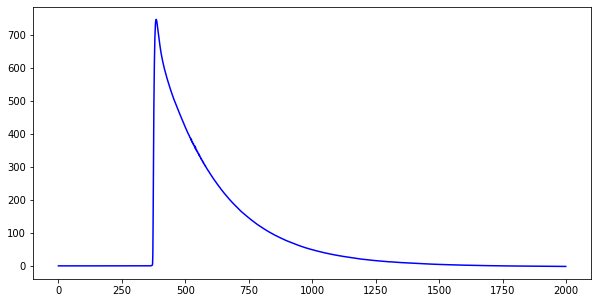

In [43]:
ydata = data1
xdata= np.arange(len(ydata))
plt.plot(xdata, ydata, 'b-', label='data')

In [13]:
popt, pcov = curve_fit(func, xdata, ydata)
popt

NameError: name 'curve_fit' is not defined

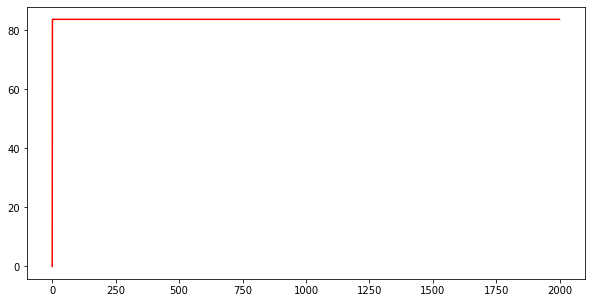

In [46]:
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

In [23]:
#from scipy.optimize import leastsq
#x, flag = leastsq(residuals, x0, args=(data1, t))
#print (x)

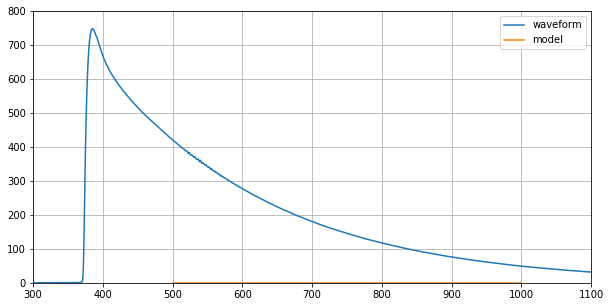

2000

In [98]:
plt.plot(t,data1,t[500:1000:1], model(t[500:1000:1], x0)) 
#print(model(t[500:1000:1], x0))
plt.legend(['waveform', 'model']) 
plt.ylim(0,800)
plt.xlim(300,1100)

#plt.yscale('log')
plt.grid(True)
plt.show()
t.size

In [99]:
def model(t, coeffs):
    #return (coeffs[0]*np.exp(-(t-coeffs[1])/coeffs[2]) + coeffs[3]*np.exp(-(t-coeffs[1])/coeffs[4]))
    #return (coeffs[0]+ coeffs[1]*np.exp(-(t-coeffs[2])/coeffs[3]) )
    return (coeffs[0]*np.exp(-t*coeffs[1]))

#x0 = np.array([365, 5,1 , 600, 10], dtype=float)
x0 = np.array([752, 0.00745,], dtype=float)
print(x0)
def residuals(coeffs, y, t):
    return y - model(t, coeffs)

[7.52e+02 7.45e-03]


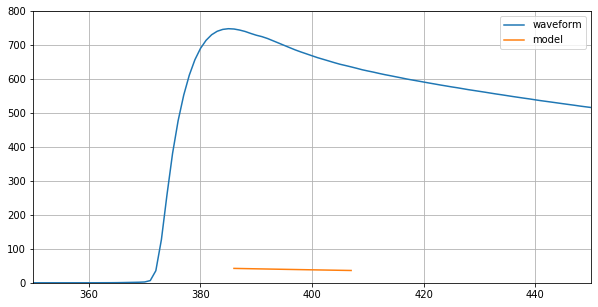

2000

In [100]:
plt.plot(t,data1,t[386:408:1], model(t[386:408:1], x0)) 
#print(model(t[500:1000:1], x0))
plt.legend(['waveform', 'model']) 
plt.ylim(0,800)
plt.xlim(350,450)

#plt.yscale('log')
plt.grid(True)
plt.show()
t.size

In [184]:
def exp_decay(parameters,xdata):
    '''
    Calculate an exponetial decay of the form:
    S= a * exp(-xdata/b)
    '''
    a = parameters[0]
    b = parameters[1]
    return a * np.exp(-xdata*b)

def model(t, coeffs):
    #return (coeffs[0]*np.exp(-(t-coeffs[1])/coeffs[2]) + coeffs[3]*np.exp(-(t-coeffs[1])/coeffs[4]))
    #return (coeffs[0]+ coeffs[1]*np.exp(-(t-coeffs[2])/coeffs[3]) )
    return (coeffs[0]*np.exp(-t*coeffs[1]))

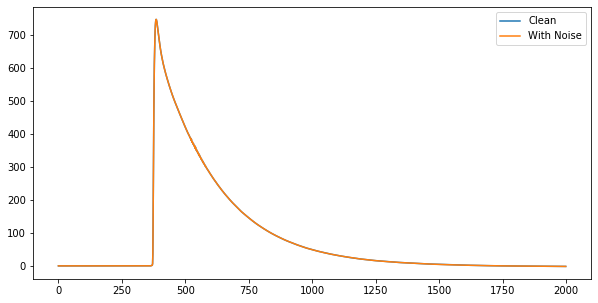

In [185]:
y_data = data1
xdata= np.arange(len(ydata))
y_data_with_noise = y_data + np.random.normal(0,.005,(len(y_data)))
A = 3.675e+03
B = 4.330e-03
parameters_used = [A,B]
plt.plot(xdata,y_data_with_noise,'-',xdata,y_data,'-')
plt.legend(('Clean','With Noise'))

In [186]:
def residuals(parameters,x_data,y_observed,func):
    '''
    Compute residuals of y_predicted - y_observed
    where:
    y_predicted = func(parameters,x_data)
    '''
    return func(parameters,x_data) - y_observed

In [187]:
from   scipy import optimize
x0 = [1, 1]
#lb = [0,0]
#ub = [10,10]


In [195]:
OptimizeResult  = optimize.least_squares(residuals,  x0, bounds = (0,1),
                                          args   = ( xdata, y_data,exp_decay) )

parameters_estimated = OptimizeResult.x

y_data_predicted = exp_decay(parameters_estimated,xdata)

print( 'Predicted: ' + str( parameters_estimated))
print( 'Expected : ' + str( parameters_used))

Predicted: [0.24704328 1.        ]
Expected : [3675.0, 0.00433]


Predicted: [0.24704328 1.        ]
Expected : [3675.0, 0.00433]


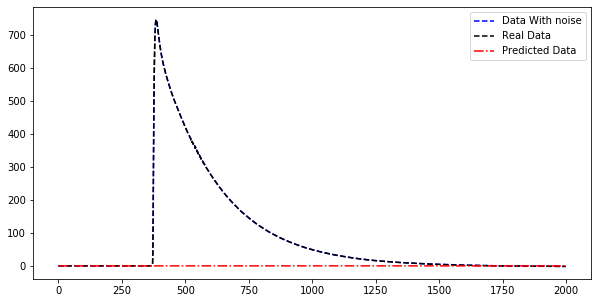

In [196]:
plt.figure(2)
plt.plot(xdata,y_data_with_noise,'--b',
         xdata,y_data           ,'--k',
         xdata,y_data_predicted ,'-.r')
plt.legend(('Data With noise','Real Data','Predicted Data'))

# How good are the parameters I estimated?
print( 'Predicted: ' + str( parameters_estimated))
print( 'Expected : ' + str( parameters_used))

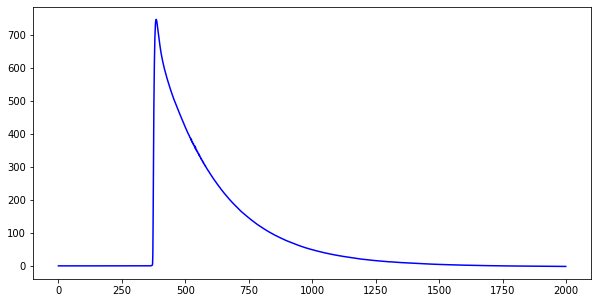

In [183]:
ydata = data1
xdata= np.arange(len(ydata))

A = 3.675e+03
B = 4.330e-03
parameters_used = [A,B]





plt.plot(xdata, ydata, 'b-', label='data')